In [1]:
# Import useful libraries
import gdeltxp
import gdeltviz
import operator
import scipy as sp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from math import isnan
from datetime import datetime
from collections import Counter, OrderedDict
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# Declare global variables
gdelt = pd.read_csv('C:/Users/Administrator/Dropbox/GDELT/all_events.csv').sort_values('SQLDATE', ascending=1)
tweet_volumes = pd.read_csv('C:/Users/Administrator/Dropbox/TWITTER/daily_tweet_volume.csv').sort_values('Dates', ascending=1)
tweet_timestamps = pd.read_csv('C:/Users/Administrator/Dropbox/TWITTER/tweet_timestamps.csv')
dates = sorted([key for key in Counter(gdelt['SQLDATE']).keys()])

In [2]:
time = sorted([datetime.strptime(date, '%a %b %d %H:%M:%S +0000 %Y') for date in list(tweet_timestamps.Timestamp)])
deltas = [(time[i+1] - time[i]).seconds for i in range(len(time)-1)]
gdelt_activity = [len(gdelt.loc[gdelt['SQLDATE'] == date]) for date in dates]
tweet_activity = [np.sum(tweet_volumes.loc[tweet_volumes['Dates'] == date, 'counts']) for date in dates]

# Comparing Events Coverage on GDELT and Twitter

In [3]:
window = 7
ind = np.arange(len(dates)) 
tweet_activity_sma = gdeltxp.movingAverage(tweet_activity, window)
gdelt_activity_sma = gdeltxp.movingAverage(gdelt_activity, window)

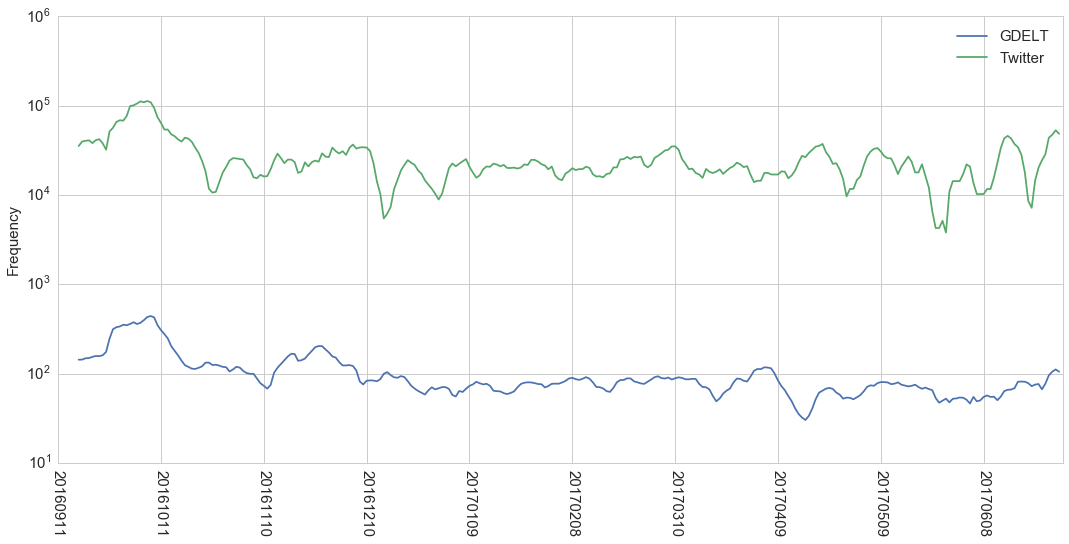

In [4]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Frequency' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, len(dates), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
ax.set_yscale('log')
plt.xlim([0,len(dates)])
ax.set_xticklabels(dates[::30])
plt.plot(ind[len(gdelt_activity)-len(gdelt_activity_sma):], gdelt_activity_sma, label='GDELT')
plt.plot(ind[len(tweet_activity)-len(tweet_activity_sma):], tweet_activity_sma, label='Twitter')
plt.legend(loc='best', fontsize=15)
plt.show()

# Event Frequency Correlation

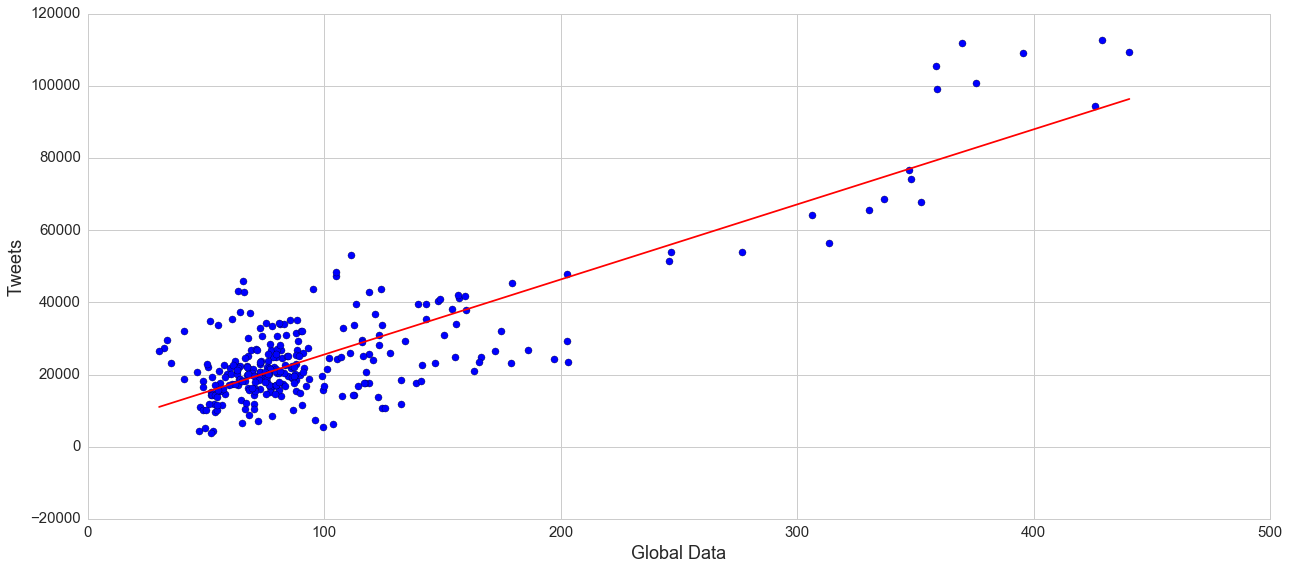

In [5]:
fig, ax = plt.subplots(figsize= (18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
plt.scatter(gdelt_activity_sma,tweet_activity_sma, s=50) #s=120
plt.plot(np.unique(gdelt_activity_sma), np.poly1d(np.polyfit(gdelt_activity_sma, tweet_activity_sma, 1))(np.unique(gdelt_activity_sma)), c='r')
#ax.set_xticks(np.arange(0, 5, 1))
ax.set_xlabel('Global Data', fontsize=18)
ax.set_ylabel('Tweets' , fontsize=18)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
#plt.axhline(y=80000, color='k', linestyle='--')
#plt.axhline(y=40000, color='k', linestyle='--')
#plt.axvline(x=475, color='k', linestyle='--')
#plt.axvline(x=355, color='k', linestyle='--')
#plt.axvline(x=225, color='k', linestyle='--')
#plt.axvline(x=100, color='k', linestyle='--')
#ax.set_yscale('log')
plt.tight_layout()
#plt.ylim([0,10e6])
plt.show()

In [6]:
sp.stats.spearmanr(gdelt_activity_sma, tweet_activity_sma)

SpearmanrResult(correlation=0.4849494868612948, pvalue=2.461300250657833e-18)

In [7]:
sp.stats.bartlett(gdelt_activity_sma, tweet_activity_sma)

BartlettResult(statistic=2746.7210513460859, pvalue=0.0)

# Cumulative Distribution Function (CDF)

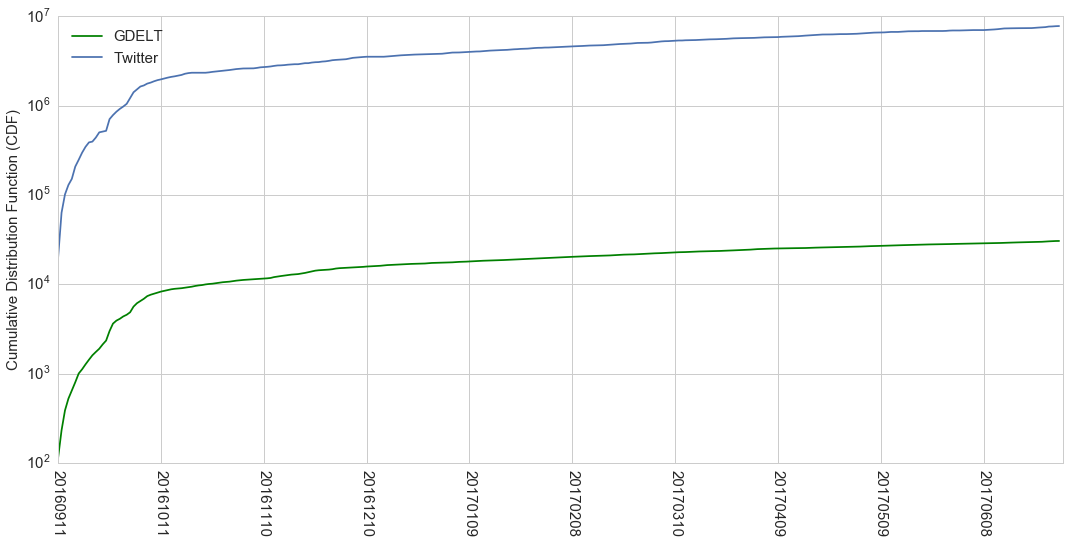

In [8]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_xlabel('', fontsize=15)
ax.set_ylabel('Cumulative Distribution Function (CDF)' , fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, len(dates), 30))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=270)
ax.set_yscale('log')
plt.xlim([0,len(dates)])
ax.set_xticklabels(dates[::30])
plt.plot(ind, np.cumsum(gdelt_activity), label='GDELT', c='g')
plt.plot(ind, np.cumsum(tweet_activity), label='Twitter')
#plt.plot(ind, scaler.fit_transform(np.cumsum(gdelt_activity).reshape(-1,1)), label='GDELT')
#plt.plot(ind, scaler.fit_transform(np.cumsum(tweet_activity).reshape(-1,1)), label='Twitter')
plt.legend(loc='best', fontsize=15)
plt.show()

# Interarrival Time Distribution

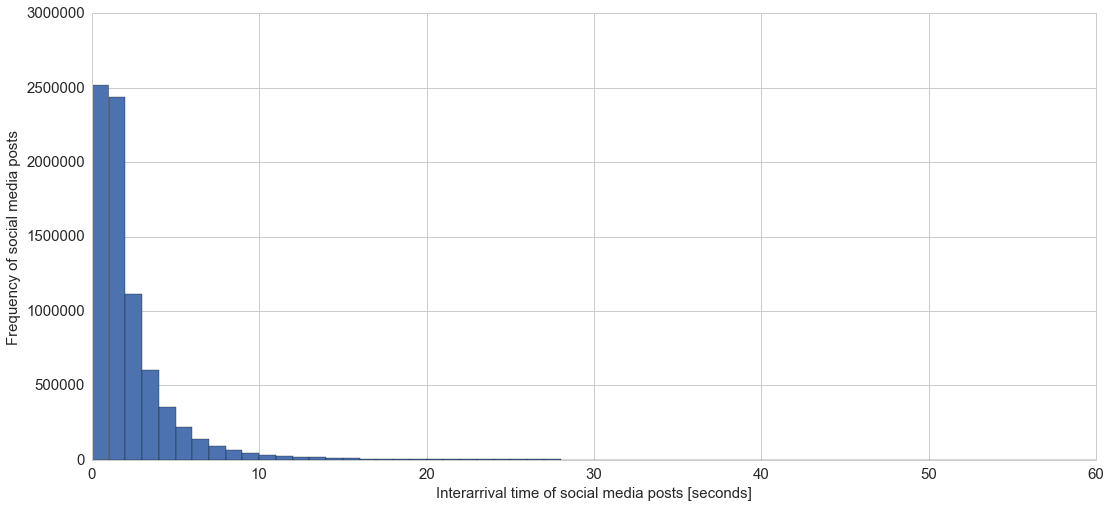

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.hist(deltas, bins=60, range=(0,60), histtype='bar', align='mid', orientation='vertical')
ax.set_title('', fontsize=15, fontweight='bold')
ax.set_ylabel('Frequency of social media posts' , fontsize=15)
ax.set_xlabel('Interarrival time of social media posts [seconds]', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xticks(np.arange(0, 70, 10))
plt.xlim([0,60])
plt.show()